In [4]:
import scipy
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import os
import seaborn as sns
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None

### 1. data applicability to research question(10)

What is our research question? 

Current researches questioning prediction power of COMPAS mainly focus on racial bias. We are interested in how other factors, such as age, gender, marital status, and sentence type, might also result in biased COMPAS scores.

COMPAS is black-boxed. We do not really know how it works inside: COMPAS never announce what and how many features they are using 

We are using probublica's data because we believe there are no better alternatives. 

Because COMPAS itself does not release data. Althought it has a [technical document]( http://www.northpointeinc.com/files/technical_documents/FieldGuide2_081412.pdf), it is very broad and does not include specific features it is using. 

Secondly, we also looked into researches prior than Propublica to see whether we may use their data. 

Thirdly, as for collection data ourselves, we don't think it is doable because as described in Propublica's article. There is limited released data from COMPAS (compas scores)and we have to find the corresponding in juridical decision published by government. 

### 2. adherence to ethical data collection standards(5)

Although we are not collecting data ourselves, instead we use data published at [Propublica's github](https://github.com/propublica/compas-analysis) . But we really tried to make sure that the data we are using now is ethically collected. 

Please find a summary of our research into [how Propublic collected its data](https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm) as below. 

Because Broward County primarily uses the score to determine whether to release or detain a defendant before his or her trial, we discarded scores that were assessed at parole, probation or other stages in the criminal justice system. That left us with 11,757 people who were assessed at the pretrial stage.

### 3. inventiveness in getting and combining data(5)

### 4. description of data (variables/features, cases/data points, descriptive stats, cautions)(20)

In [9]:
pwd

'/Users/violetyao/Desktop/Exploring-COMPAS-Bias'

In [14]:
compas_raw = pd.read_csv('data/compas-scores-raw.csv')
compas_raw.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [70]:
display(compas_raw)

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0
5,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,Low,18,Risk of Failure to Appear,19.00,3,Low,New,1,0
6,50855,57181,51963,PRETRIAL,DAYES,DANIEL,NaN,Male,African-American,08/25/94,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,4,High,7,Risk of Violence,-1.20,8,High,New,1,0
7,50855,57181,51963,PRETRIAL,DAYES,DANIEL,NaN,Male,African-American,08/25/94,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,4,High,8,Risk of Recidivism,0.18,8,High,New,1,0
8,50855,57181,51963,PRETRIAL,DAYES,DANIEL,NaN,Male,African-American,08/25/94,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,4,High,18,Risk of Failure to Appear,13.00,1,Low,New,1,0
9,50850,57176,51958,PRETRIAL,Debe,Mikerlie,George,Female,African-American,10/09/94,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Significant Other,1/1/13 0:00,2,Medium,7,Risk of Violence,-1.29,7,Medium,New,1,0


In [23]:
compas_raw.shape

(60843, 28)

In [55]:
raw_sex = compas_raw.loc[:,["Sex_Code_Text"]]
raw_sex_grouped = raw_sex.groupby(["Sex_Code_Text"]).size().reset_index()
raw_sex_grouped.columns = ["Sex_Code_Text","count"]
raw_sex_grouped

,Sex_Code_Text,count
0,Female,13329
1,Male,47514


In [90]:
raw_sex_score = compas_raw.loc[:,["Sex_Code_Text","ScoreText"]]
raw_sex_score_grouped = raw_sex_score.groupby(["Sex_Code_Text","ScoreText"]).size().reset_index()
raw_sex_score_grouped.columns = ["Sex_Code_Text","ScoreText","count"]
raw_sex_score_grouped
## how to append a column which works on percentage
raw_sex_score_grouped['percentage'] = 1.0
for i in range(3):
    raw_sex_score_grouped['percentage'][i] = raw_sex_score_grouped['count'][i] / 13329
for i in range(3,6):
    raw_sex_score_grouped['percentage'][i] = raw_sex_score_grouped['count'][i] / 47514

/Users/violetyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/violetyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [91]:
raw_sex_score_grouped

,Sex_Code_Text,ScoreText,count,percentage
0,Female,High,1040,0.078025
1,Female,Low,9796,0.734939
2,Female,Medium,2483,0.186286
3,Male,High,5783,0.121711
4,Male,Low,31691,0.666982
5,Male,Medium,10005,0.210570


In [100]:
raw_ethnic = compas_raw.loc[:,["Ethnic_Code_Text"]]
raw_ethnic_grouped = raw_ethnic.groupby(["Ethnic_Code_Text"]).size().reset_index()
raw_ethnic_grouped.columns = ["Ethnic_Code_Text","count"]
raw_ethnic_grouped

,Ethnic_Code_Text,count
0,African-American,27069
1,Arabic,75
2,Asian,324
3,Caucasian,21783
4,Hispanic,8742
5,Native American,219
6,Oriental,39
7,Other,2592


clean data: combine "African-Am" to "African-American"

In [99]:
for i in range(60843):
    if compas_raw["Ethnic_Code_Text"][i] == "African-Am":
        compas_raw["Ethnic_Code_Text"][i] = "African-American"

/Users/violetyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [119]:
raw_ethnic_score_grouped = compas_raw.groupby(['Ethnic_Code_Text', 'ScoreText']).agg({'ScoreText': 'count'})
raw_ethnic_score_grouped = raw_ethnic_score_grouped.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [120]:
raw_ethnic_score_grouped

ScoreText
Ethnic_Code_Text ScoreText           
African-American High       16.855802
                 Low        57.239493
                 Medium     25.904706
Arabic           High        6.666667
                 Low        77.333333
                 Medium     16.000000
Asian            High        4.320988
                 Low        85.802469
                 Medium      9.876543
Caucasian        High        7.571790
                 Low        75.171146
                 Medium     17.257064
Hispanic         High        5.416237
                 Low        79.732051
                 Medium     14.851712
Native American  High       14.611872
                 Low        63.926941
                 Medium     21.461187
Oriental         High        5.128205
                 Low        84.615385
                 Medium     10.256410
Other            High        3.436293
                 Low        83.745174
                 Medium     12.818533

In [118]:
raw_ethnic_score = compas_raw.loc[:,["Ethnic_Code_Text","ScoreText"]]
raw_ethnic_score_grouped = raw_ethnic_score.groupby(["Ethnic_Code_Text","ScoreText"]).size().reset_index()
raw_ethnic_score_grouped.columns = ["Ethnic_Code_Text","ScoreText","count"]
raw_ethnic_score_grouped

,Ethnic_Code_Text,ScoreText,count
0,African-American,High,4560
1,African-American,Low,15485
2,African-American,Medium,7008
3,Arabic,High,5
4,Arabic,Low,58
5,Arabic,Medium,12
6,Asian,High,14
7,Asian,Low,278
8,Asian,Medium,32
9,Caucasian,High,1648


<function matplotlib.pyplot.show(*args, **kw)>

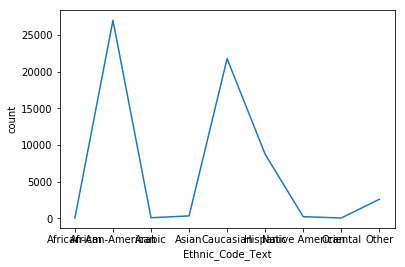

In [60]:
sns.lineplot(x = 'Ethnic_Code_Text', y = 'count', data = raw_ethnic_grouped, legend = False)
plt.show

In [61]:
raw_english = compas_raw.loc[:,["Language"]]
raw_english_grouped = raw_english.groupby(["Language"]).size().reset_index()
raw_english_grouped.columns = ["Language","count"]
raw_english_grouped

,Language,count
0,English,60591
1,Spanish,252


In [122]:
raw_english_score_grouped = compas_raw.groupby(["Language", 'ScoreText']).agg({'ScoreText': 'count'})
raw_english_score_grouped = raw_english_score_grouped.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
raw_english_score_grouped
# it is worth noticing that spanish speaking has lower score

ScoreText
Language ScoreText           
English  High       11.265814
         Low        68.146533
         Medium     20.587652
Spanish  High        0.793651
         Low        90.079365
         Medium      9.126984

In [124]:
raw_marriage = compas_raw.loc[:,["MaritalStatus"]]
raw_marriage_grouped = raw_marriage.groupby(["MaritalStatus"]).size().reset_index()
raw_marriage_grouped.columns = ["MaritalStatus","count"]
raw_marriage_grouped

,MaritalStatus,count
0,Divorced,3879
1,Married,8172
2,Separated,1803
3,Significant Other,1260
4,Single,45126
5,Unknown,213
6,Widowed,390


In [123]:
raw_marriage_score_grouped = compas_raw.groupby(["MaritalStatus", 'ScoreText']).agg({'ScoreText': 'count'})
raw_marriage_score_grouped = raw_marriage_score_grouped.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
raw_marriage_score_grouped

ScoreText
MaritalStatus     ScoreText           
Divorced          High        4.823317
                  Low        83.930874
                  Medium     11.245809
Married           High        3.858875
                  Low        86.451060
                  Medium      9.690065
Separated         High        5.327414
                  Low        79.633740
                  Medium     15.038846
Significant Other High        8.028617
                  Low        72.019078
                  Medium     19.952305
Single            High       13.491518
                  Low        62.885021
                  Medium     23.623462
Unknown           High        3.755869
                  Low        79.812207
                  Medium     16.431925
Widowed           High        8.205128
                  Low        78.717949
                  Medium     13.076923

In [65]:
raw_legalstatus = compas_raw.loc[:,["LegalStatus"]]
raw_legalstatus_grouped = raw_legalstatus.groupby(["LegalStatus"]).size().reset_index()
raw_legalstatus_grouped.columns = ["LegalStatus","count"]
raw_legalstatus_grouped

,LegalStatus,count
0,Conditional Release,420
1,Deferred Sentencing,12
2,Other,4356
3,Parole Violator,18
4,Post Sentence,18333
5,Pretrial,37578
6,Probation Violator,126


In [126]:
raw_legalstatus_score_grouped = compas_raw.groupby(["LegalStatus", 'ScoreText']).agg({'ScoreText': 'count'})
raw_legalstatus_score_grouped = raw_legalstatus_score_grouped.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
raw_legalstatus_score_grouped

ScoreText
LegalStatus         ScoreText           
Conditional Release High       14.354067
                    Low        63.875598
                    Medium     21.770335
Deferred Sentencing High       16.666667
                    Low        66.666667
                    Medium     16.666667
Other               High        4.805702
                    Low        79.719476
                    Medium     15.474822
Parole Violator     Low        94.444444
                    Medium      5.555556
Post Sentence       High        9.225898
                    Low        71.519817
                    Medium     19.254285
Pretrial            High       12.849802
                    Low        65.439199
                    Medium     21.710999
Probation Violator  High       28.571429
                    Low        39.682540
                    Medium     31.746032

In [69]:
raw_custody = compas_raw.loc[:,["CustodyStatus"]]
raw_custody_grouped = raw_custody.groupby(["CustodyStatus"]).size().reset_index()
raw_custody_grouped.columns = ["CustodyStatus","count"]
raw_custody_grouped

,CustodyStatus,count
0,Jail Inmate,30129
1,Parole,21
2,Pretrial Defendant,7644
3,Prison Inmate,15
4,Probation,22968
5,Residential Program,66


In [127]:
raw_custody_score_grouped = compas_raw.groupby(["CustodyStatus", 'ScoreText']).agg({'ScoreText': 'count'})
raw_custody_score_grouped = raw_custody_score_grouped.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
raw_custody_score_grouped

ScoreText
CustodyStatus       ScoreText           
Jail Inmate         High       12.418648
                    Low        65.878603
                    Medium     21.702749
Parole              High       19.047619
                    Low        52.380952
                    Medium     28.571429
Pretrial Defendant  High       14.631593
                    Low        63.630415
                    Medium     21.737992
Prison Inmate       High       13.333333
                    Low        60.000000
                    Medium     26.666667
Probation           High        8.464824
                    Low        72.944817
                    Medium     18.590358
Residential Program High       26.984127
                    Low        47.619048
                    Medium     25.396825

In [73]:
raw_agency = compas_raw.loc[:,["Agency_Text"]]
raw_agency_grouped = raw_agency.groupby(["Agency_Text"]).size().reset_index()
raw_agency_grouped.columns = ["Agency_Text","count"]
raw_agency_grouped

,Agency_Text,count
0,Broward County,123
1,DRRD,564
2,PRETRIAL,41100
3,Probation,19056


In [66]:
raw_reason = compas_raw.loc[:,["AssessmentReason"]]
raw_reason_grouped = raw_reason.groupby(["AssessmentReason"]).size().reset_index()
raw_reason_grouped.columns = ["AssessmentReason","count"]
raw_reason_grouped

,AssessmentReason,count
0,Intake,60843


#### compas_two_year

In [129]:
compas_two_year = pd.read_csv('data/compas-scores-two-years.csv')
display(compas_two_year)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
5,7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,0,1,0,0,0,0.0,2013-11-30 04:50:18,2013-12-01 12:28:56,13022355MM10A,2013-11-30,NaN,0.0,M,Battery,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-11-30,Risk of Violence,1,Low,2013-11-30,2013-11-30,2013-12-01,0,1,853,0,0
6,8,edward riddle,edward,riddle,2014-02-19,Male,1974-07-23,41,25 - 45,Caucasian,0,6,0,0,14,-1.0,2014-02-18 05:08:24,2014-02-24 12:18:30,14002304CF10A,2014-02-18,NaN,1.0,F,Possession Burglary Tools,1,14004485CF10A,(F2),0.0,2014-03-31,Poss of Firearm by Convic Felo,2014-03-31,2014-04-18,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,6,Medium,2014-02-19,Risk of Violence,2,Low,2014-02-19,2014-03-31,2014-04-18,14,5,40,1,1
7,9,steven stewart,steven,stewart,2013-08-30,Male,1973-02-25,43,25 - 45,Other,0,4,0,0,3,-1.0,2013-08-29 08:55:23,2013-08-30 08:42:13,13012216CF10A,NaN,2013-08-29,1.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-08-30,Risk of Violence,3,Low,2013-08-30,2014-05-22,2014-06-03,3,0,265,0,0
8,10,elizabeth thieme,elizabeth,thieme,2014-03-16,Female,1976-06-03,39,25 - 45,Caucasian,0,1,0,0,0,-1.0,2014-03-15 05:35:34,2014-03-18 04:28:46,14004524MM10A,2014-03-15,NaN,1.0,M,Battery,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2014-03-16,Risk of Violence,1,Low,2014-03-16,2014-03-15,2014-03-18,0,2,747,0,0
9,13,bo bradac,bo,bradac,2013-11-04,Male,1994-06-10,21,Less

In [146]:
compas_two_year_violent['dob'][1] in compas_two_year['dob'].tolist()

True

In [142]:
compas_two_year_violent['dob'][1]

'1982-01-22'

In [143]:
compas_two_year['dob'][1]

'1982-01-22'

In [151]:
for i in range(4000):
    if compas_two_year_violent['id'][i] not in compas_two_year['id'].tolist():
        print(compas_two_year_violent['id'][i])

3708
4995
6283
7132
8766


In [24]:
compas_two_year.shape

(7214, 53)

#### compas_two_year_violent

In [128]:
compas_two_year_violent = pd.read_csv('data/compas-scores-two-years-violent.csv')
display(compas_two_year_violent)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,two_year_recid.1
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1,1
2,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0,0
3,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0,0
4,7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,0,1,0,0,0,0.0,2013-11-30 04:50:18,2013-12-01 12:28:56,13022355MM10A,2013-11-30,NaN,0.0,M,Battery,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-11-30,Risk of Violence,1,Low,2013-11-30,2013-11-30,2013-12-01,0,1,853,0,0,0
5,9,steven stewart,steven,stewart,2013-08-30,Male,1973-02-25,43,25 - 45,Other,0,4,0,0,3,-1.0,2013-08-29 08:55:23,2013-08-30 08:42:13,13012216CF10A,NaN,2013-08-29,1.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-08-30,Risk of Violence,3,Low,2013-08-30,2014-05-22,2014-06-03,3,0,265,0,0,0
6,10,elizabeth thieme,elizabeth,thieme,2014-03-16,Female,1976-06-03,39,25 - 45,Caucasian,0,1,0,0,0,-1.0,2014-03-15 05:35:34,2014-03-18 04:28:46,14004524MM10A,2014-03-15,NaN,1.0,M,Battery,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2014-03-16,Risk of Violence,1,Low,2014-03-16,2014-03-15,2014-03-18,0,2,747,0,0,0
7,13,bo bradac,bo,bradac,2013-11-04,Male,1994-06-10,21,Less than 25,Caucasian,0,3,0,0,1,428.0,2015-01-06 03:55:34,2015-01-07 03:38:44,13000017CF10A,2012-12-31,NaN,308.0,F,Insurance Fraud,1,15002891MM10A,(M1),0.0,2015-01-06,Battery,2015-01-06,2015-01-07,NaN,1,15000258CF10A,(F2),2015-01-06,Aggrav Battery w/Deadly Weapon,Risk of Recidivism,3,Low,2013-11-04,Risk of Violence,5,Medium,2013-11-04,2015-01-06,2015-01-07,1,0,428,1,1,1
8,14,benjamin franc,benjamin,franc,2013-11-26,Male,1988-06-01,27,25 - 45,Caucasian,0,4,0,0,0,-1.0,2013-11-25 06:31:06,2013-11-26 08:26:57,13016402CF10A,2013-11-25,NaN,1.0,F,"Poss 3,4 MDMA (Ecstasy)",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-11-26,Risk of Violence,4,Low,2013-11-26,2013-11-25,2013-11-26,0,0,857,0,0,0
9,16,kortney coleman,kortney,coleman,2013-01-01,Female,1978-08

In [27]:
compas_two_year_violent.shape

(4743, 54)

In [29]:
compas_two_year_violent['id'][1]

3

In [30]:
max = 0
for i in range(1,4743):
    if compas_two_year_violent['id'][i] > max:
        max = compas_two_year_violent['id'][i]

In [31]:
max

11000

In [ ]:
graph age, gender, race, screening time

In [43]:
violent_sex = compas_two_year_violent.loc[:,["sex"]]
violent_sex_grouped = violent_sex.groupby(["sex"]).size().reset_index()
violent_sex_grouped.columns = ["sex","count"]

In [45]:
violent_sex_grouped

,sex,count
0,Female,997
1,Male,3746


<function matplotlib.pyplot.show(*args, **kw)>

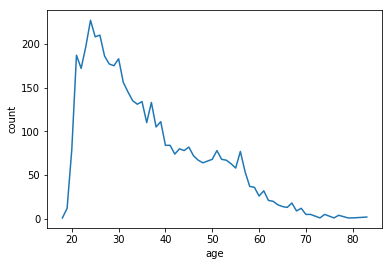

In [50]:
age_grouped = compas_two_year_violent.groupby(["age"]).size().reset_index()
age_grouped.columns = ["age","count"]
sns.lineplot(x = 'age', y = 'count', data = age_grouped, legend = False)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

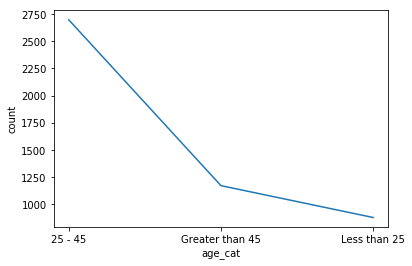

In [52]:
age_cat_grouped = compas_two_year_violent.groupby(["age_cat"]).size().reset_index()
age_cat_grouped.columns = ["age_cat","count"]
sns.lineplot(x = 'age_cat', y = 'count', data = age_cat_grouped, legend = False)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

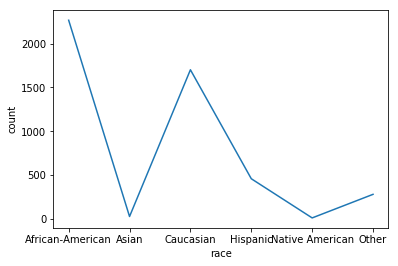

In [51]:
race_grouped = compas_two_year_violent.groupby(["race"]).size().reset_index()
race_grouped.columns = ["race","count"]
sns.lineplot(x = 'race', y = 'count', data = race_grouped, legend = False)
plt.show

In [ ]:
district = sfpd.loc[:, ["PdDistrict","Category"]]
grouped = DTIC.groupby(["DayOfWeek"]).size().reset_index()
grouped.columns = ["DayOfWeek","count"]
sns.lineplot(x = 'DayOfWeek', y = 'count', data = grouped, legend = False)
plt.show

### 5. visualizations to help understand data(20)